In [1]:
# Step 1: Download the stock prices for the specified companies

import yfinance as yf
import pandas as pd

# Define the list of stock symbols
symbols = ['GOOGL', 'AMZN', 'META', 'MSFT', 'AAPL']

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2023-12-30'

# Initialize an empty dictionary to store adjusted close prices
stock_data = {}

# Loop through each symbol and download data
for symbol in symbols:
    # Fetch data from Yahoo Finance within the specified date range
    data = yf.download(symbol, start=start_date, end=end_date)
    
    # Extract and store the adjusted closing price
    stock_data[symbol] = data['Adj Close']
    # Display a message confirming data download
    print(f"Downloaded data for {symbol} from {start_date} to {end_date}")

# Convert the dictionary to a DataFrame
stock_df = pd.DataFrame(stock_data)

# Check the actual date range of the downloaded data
print("\nStock Data Date Ranges:\n")
print(stock_df.index.min(), stock_df.index.max())

# Display the first and last date in the DataFrame
first_date = stock_df.index.min()
last_date = stock_df.index.max()
print(f"\nFirst Date in DataFrame: {first_date}")
print(f"Last Date in DataFrame: {last_date}")

# Ensure the DataFrame only contains the intended date range
stock_df = stock_df[(stock_df.index >= pd.to_datetime(start_date)) & (stock_df.index <= pd.to_datetime(end_date))]

# Display the first few rows of the stock DataFrame
print(stock_df.head())

# Optional: Save the combined DataFrame to a CSV file
stock_df.to_csv('combined_stock_data.csv')

print("All stock data has been downloaded and saved successfully.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Downloaded data for GOOGL from 2022-01-01 to 2023-12-30
Downloaded data for AMZN from 2022-01-01 to 2023-12-30


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Downloaded data for META from 2022-01-01 to 2023-12-30
Downloaded data for MSFT from 2022-01-01 to 2023-12-30


[*********************100%%**********************]  1 of 1 completed

Downloaded data for AAPL from 2022-01-01 to 2023-12-30

Stock Data Date Ranges:

2022-01-03 00:00:00 2023-12-29 00:00:00

First Date in DataFrame: 2022-01-03 00:00:00
Last Date in DataFrame: 2023-12-29 00:00:00
                 GOOGL        AMZN        META        MSFT        AAPL
Date                                                                  
2022-01-03  144.633362  170.404495  337.845734  326.940826  179.273621
2022-01-04  144.042831  167.522003  335.839874  321.334778  176.998322
2022-01-05  137.434677  164.356995  323.505219  308.999329  172.290192
2022-01-06  137.407257  163.253998  331.778229  306.557678  169.414124
2022-01-07  136.678558  162.554001  331.109619  306.714020  169.581558
All stock data has been downloaded and saved successfully.


In [2]:
# Step 2: Download the cryptocurrency prices for the specified assets
import requests
import pandas as pd
from datetime import datetime, timedelta

# Define your CryptoCompare API key
API_KEY = 'c7eacfd3b8089aeb623e92d0f549885e6b67f40c2c924796b72f916e6a70f98a'

# Define the list of cryptocurrencies with their symbols
crypto_symbols = {
    'BTC': 'Bitcoin',
    'ETH': 'Ethereum',
    'USDT': 'Tether',
    'BNB': 'Binance Coin',
    'USDC': 'USD Coin'
}

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2023-12-30'

# Convert dates to datetime objects
start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')

# Initialize an empty dictionary to store DataFrames
crypto_data = {}

# Function to fetch historical data for a given cryptocurrency
def fetch_crypto_data(symbol, start_date, end_date):
    # Initialize an empty list to store the data
    all_data = []

    # Current end date set to the final end date initially
    current_end_date = end_date

    # Fetch data in chunks of 2000 days (CryptoCompare's max limit per request)
    while current_end_date > start_date:
        # Set the timestamp to the current end date
        toTs = int(current_end_date.timestamp())
        # Define the URL for the API request
        url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={symbol}&tsym=USD&limit=2000&toTs={toTs}&api_key={API_KEY}"

        # Make the API request
        response = requests.get(url)
        data = response.json()

        # Check if data retrieval was successful
        if data['Response'] == 'Success' and 'Data' in data['Data']:
            # Append the data chunk to the all_data list
            all_data.extend(data['Data']['Data'])
            # Update the current end date to 1 day before the earliest date received
            earliest_date = pd.to_datetime(data['Data']['Data'][0]['time'], unit='s')
            current_end_date = earliest_date - timedelta(days=1)
        else:
            print(f"Error fetching data for {symbol}: {data.get('Message', 'Unknown error')}")
            break

    # Convert the collected data into a DataFrame
    df = pd.DataFrame(all_data)
    if not df.empty:
        df['time'] = pd.to_datetime(df['time'], unit='s')
        df.set_index('time', inplace=True)
        df = df[['close']]  # Keep only the close price
        df.columns = [symbol]  # Rename the column to the cryptocurrency symbol
        # Filter data to ensure it matches the intended date range
        df = df[(df.index >= start_date) & (df.index <= end_date)]
    else:
        print(f"No data returned for {symbol}")

    return df

# Loop through each cryptocurrency and download data
for symbol, name in crypto_symbols.items():
    # Fetch data for the specified date range
    df = fetch_crypto_data(symbol, start_date_dt, end_date_dt)
    # Store the data in the dictionary if the DataFrame is not empty
    if not df.empty:
        crypto_data[name] = df
        print(f"Downloaded data for {name} from {start_date} to {end_date}")
    else:
        print(f"Failed to download data for {name}")

# Combine all data into a single DataFrame
if crypto_data:
    crypto_df = pd.concat(crypto_data.values(), axis=1)
    # Display the first and last dates in the combined DataFrame
    first_date = crypto_df.index.min()
    last_date = crypto_df.index.max()
    print(f"\nFirst Date in DataFrame: {first_date}")
    print(f"Last Date in DataFrame: {last_date}")
    # Display the first few rows of the combined data
    print(crypto_df.head())
    # Optional: Save the combined DataFrame to a CSV file
    crypto_df.to_csv('crypto_data_combined.csv')
    print("All cryptocurrency data has been downloaded and saved successfully.")
else:
    print("No data was successfully downloaded.")

Downloaded data for Bitcoin from 2022-01-01 to 2023-12-30
Downloaded data for Ethereum from 2022-01-01 to 2023-12-30
Downloaded data for Tether from 2022-01-01 to 2023-12-30
Downloaded data for Binance Coin from 2022-01-01 to 2023-12-30
Downloaded data for USD Coin from 2022-01-01 to 2023-12-30

First Date in DataFrame: 2022-01-01 00:00:00
Last Date in DataFrame: 2023-12-30 00:00:00
                 BTC      ETH    USDT     BNB    USDC
time                                                 
2022-01-01  47737.35  3766.74  1.0000  527.50  1.0000
2022-01-02  47306.41  3830.92  1.0000  531.25  1.0000
2022-01-03  46450.79  3765.16  1.0000  511.89  1.0000
2022-01-04  45824.54  3785.67  0.9997  506.73  0.9997
2022-01-05  43432.51  3536.77  0.9999  473.76  0.9998
All cryptocurrency data has been downloaded and saved successfully.


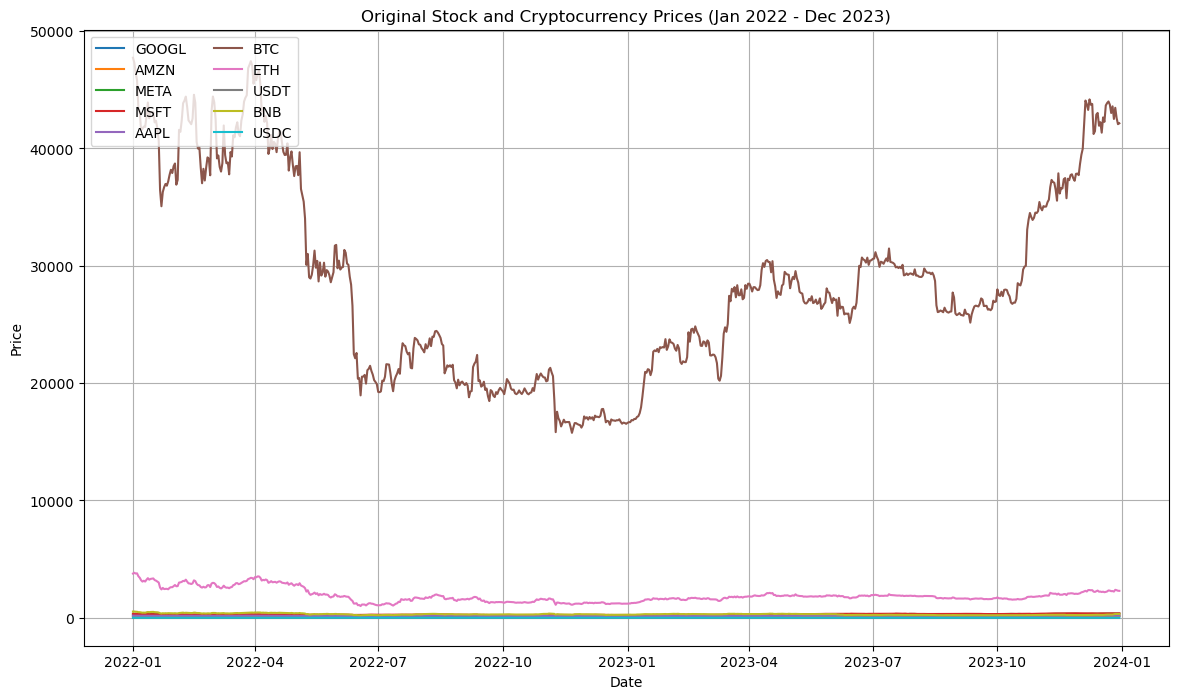

               GOOGL      AMZN      META      MSFT      AAPL       BTC  \
2022-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2022-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  0.990973   
2022-01-03  1.000000  1.000000  1.000000  1.000000  1.000000  0.973049   
2022-01-04  0.995917  0.983084  0.994063  0.982853  0.987308  0.959931   
2022-01-05  0.950228  0.964511  0.957553  0.945123  0.961046  0.909822   

                 ETH    USDT       BNB    USDC  
2022-01-01  1.000000  1.0000  1.000000  1.0000  
2022-01-02  1.017039  1.0000  1.007109  1.0000  
2022-01-03  0.999581  1.0000  0.970408  1.0000  
2022-01-04  1.005026  0.9997  0.960626  0.9997  
2022-01-05  0.938947  0.9999  0.898123  0.9998  


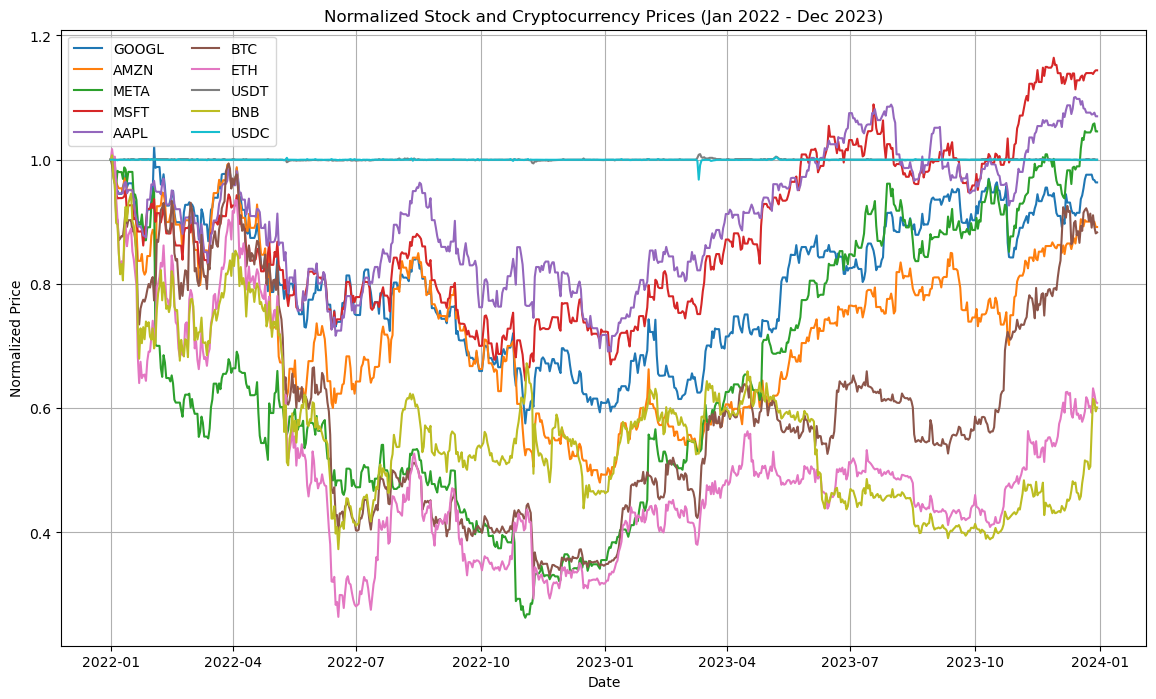

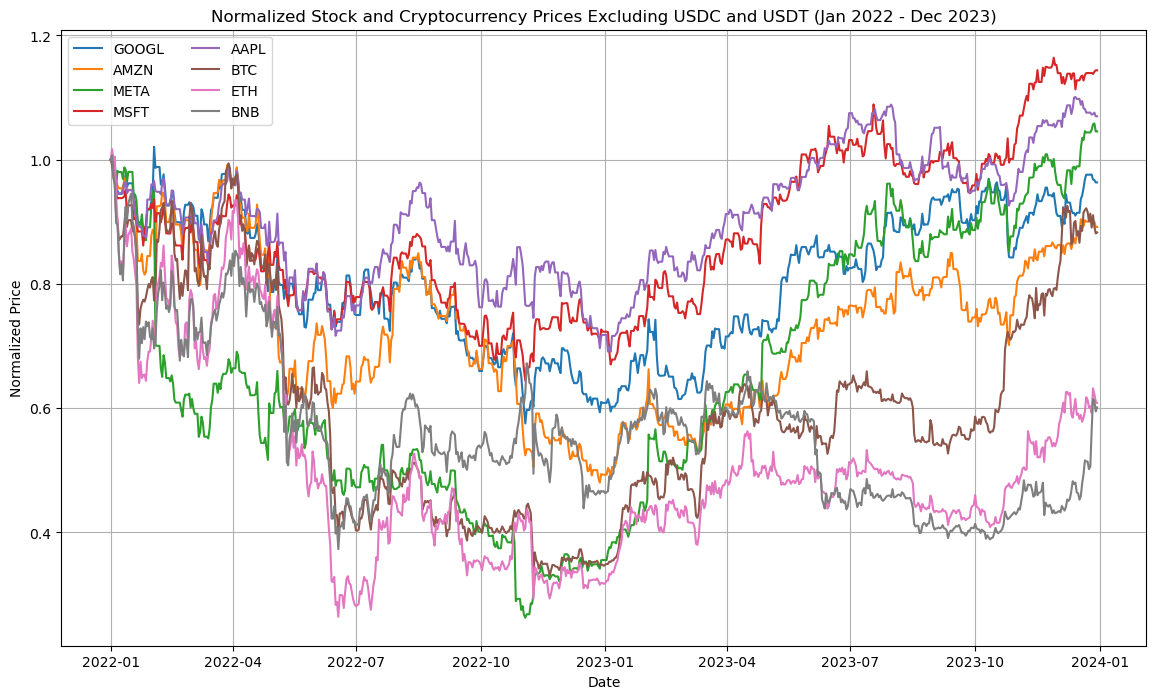

In [3]:
# Step 3: Lets explore the data in a "test" dataframe and chart the results and look for patterns.
# First change - the price of BTC is so high charting the data isn't informative, lets normalize the prices.
# Second change is to drop Tether USDT and US Dollar coin USDC from the consideration, as both of them are
# clearly pegged to the dollar, and are flat line that I don't think will add anything to the analysis

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Combine both datasets into a single DataFrame named explore_combined_df
# Ensure that stock_df and crypto_df are already available from the previous steps
explore_combined_df = pd.concat([stock_df, crypto_df], axis=1)

# Check for any missing data and fill forward/backward (optional, based on data quality)
explore_combined_df = explore_combined_df.ffill().bfill()

# Plot the original stock and cryptocurrency prices
plt.figure(figsize=(14, 8))
for column in explore_combined_df.columns:
    plt.plot(explore_combined_df.index, explore_combined_df[column], label=column)

plt.title('Original Stock and Cryptocurrency Prices (Jan 2022 - Dec 2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)

# Save the first plot to a PNG file
plt.savefig('original_prices.png')
plt.show()

# Normalize each stock and cryptocurrency price separately to start at 1 within explore_combined_df
explore_combined_df = explore_combined_df.apply(lambda x: x / x.iloc[0])

# Display the first few rows of the normalized DataFrame for verification
print(explore_combined_df.head())

# Plot the normalized data to visualize the relative performance
plt.figure(figsize=(14, 8))
for column in explore_combined_df.columns:
    plt.plot(explore_combined_df.index, explore_combined_df[column], label=column)

plt.title('Normalized Stock and Cryptocurrency Prices (Jan 2022 - Dec 2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)

# Save the second plot to a PNG file
plt.savefig('normalized_prices.png')
plt.show()

# Remove 'USDC' and 'USDT' from the explore_combined_df for the next plot
explore_combined_df_no_usdc_usdt = explore_combined_df.drop(columns=['USDC', 'USDT'], errors='ignore')

# Plot the normalized data excluding USDC and USDT
plt.figure(figsize=(14, 8))
for column in explore_combined_df_no_usdc_usdt.columns:
    plt.plot(explore_combined_df_no_usdc_usdt.index, explore_combined_df_no_usdc_usdt[column], label=column)

plt.title('Normalized Stock and Cryptocurrency Prices Excluding USDC and USDT (Jan 2022 - Dec 2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)

# Save the third plot to a PNG file
plt.savefig('normalized_prices_excluding_usdc_usdt.png')
plt.show()

In [4]:
# Step 4 - Data preparation and feature engineering for the main analysis.
# Align the stock and BTC data, create lagged features, rolling averages, and future price targets for BTC.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller

# Assume `stock_df` contains stock prices and `crypto_df` contains BTC prices
# Combine stock and BTC data into one DataFrame
combined_data = pd.concat([stock_df, crypto_df[['BTC']]], axis=1)

# Impute missing values using mean imputation (optional, based on need)
imputer = SimpleImputer(strategy='mean')
combined_data = pd.DataFrame(imputer.fit_transform(combined_data), columns=combined_data.columns, index=combined_data.index)

# Create lagged features for each stock to capture historical information
lags = [1, 7, 14, 28]  # Define lags for feature creation
for lag in lags:
    for stock in stock_df.columns:
        combined_data[f'{stock}_lag{lag}'] = combined_data[stock].shift(lag)

# Create rolling averages to capture short-term trends in stock prices
for window in [7, 14, 28]:
    for stock in stock_df.columns:
        combined_data[f'{stock}_rolling{window}'] = combined_data[stock].rolling(window).mean()

# Create the target variable: BTC future prices at different intervals
futures = [0, 1, 7, 14, 28]  # Include 0 to predict the current BTC price
for future in futures:
    combined_data[f'BTC_{future}d'] = combined_data['BTC'].shift(-future)

# Create the differenced feature for stationarity checks (ARIMA/SARIMA)
combined_data['BTC_diff'] = combined_data['BTC'].diff()

# Drop rows with NaN values after all transformations
combined_data.dropna(inplace=True)

# Feature Scaling: Scale the features for Linear Regression and Random Forest
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_data.drop(columns=[f'BTC_{f}d' for f in futures]))

# Perform ADF test to check stationarity
adf_test = adfuller(combined_data['BTC_diff'])
print(f'ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}')

# Remove highly correlated features using VarianceThreshold (if applicable)
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(scaled_features)

# Train-Test Split: Split data into training and test sets, ensuring no leakage of future data
# Adjust the dates based on your available data and analysis goals
train_data = combined_data[:'2023-06-30']
test_data = combined_data['2023-07-01':]

# Display the first and last dates in the DataFrame
first_date = combined_data.index.min()
last_date = combined_data.index.max()
print(f"\nFirst Date in DataFrame: {first_date}")
print(f"Last Date in DataFrame: {last_date}")

# Display the first few rows to verify the feature creation and scaling
print(combined_data.head())

# Output the combined data to a CSV file for visual inspection
combined_data.to_csv('combined_data.csv', index=True)  # Save the DataFrame to a CSV file
print("Data saved to combined_data.csv for visual inspection.")


ADF Statistic: -8.323087553894723, p-value: 3.5292999722454746e-13

First Date in DataFrame: 2022-01-29 00:00:00
Last Date in DataFrame: 2023-12-02 00:00:00
                 GOOGL        AMZN        META        MSFT        AAPL  \
2022-01-29  116.485083  123.740526  220.272266  287.344283  162.188444   
2022-01-30  116.485083  123.740526  220.272266  287.344283  162.188444   
2022-01-31  134.969299  149.573502  312.617584  303.725342  172.152328   
2022-02-01  137.304016  151.193497  318.345825  301.557129  171.984894   
2022-02-02  147.634430  150.612503  322.337616  306.147491  173.196381   

                 BTC  GOOGL_lag1   AMZN_lag1   META_lag1   MSFT_lag1  ...  \
2022-01-29  38184.86  133.021606  143.977997  301.091248  301.068817  ...   
2022-01-30  37908.44  116.485083  123.740526  220.272266  287.344283  ...   
2022-01-31  38494.66  116.485083  123.740526  220.272266  287.344283  ...   
2022-02-01  38721.49  134.969299  149.573502  312.617584  303.725342  ...   
2022-02-02  3

In [5]:
# Step 5 - Modelling. Let's try to model the relationship between current stock prices
# and future BTC prices. We will use multiple techniques and compare the results to find the best one.
# Note: multiple iterations made to this code to avoid or trap error warnings during execution.

import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Suppress warnings
warnings.filterwarnings("ignore")

# Load prepared data
combined_data = pd.read_csv('combined_data.csv', index_col=0, parse_dates=True)

# Define features (X) and targets (y) for modeling
features = combined_data.drop(columns=['BTC_0d', 'BTC_1d', 'BTC_7d', 'BTC_14d', 'BTC_28d'])
targets = combined_data[['BTC_0d', 'BTC_1d', 'BTC_7d', 'BTC_14d', 'BTC_28d']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)

# Initialize a list to collect results
results_list = []

# 1. Linear Regression
for col in y_train.columns:
    lr = LinearRegression()
    lr.fit(X_train, y_train[col])
    y_pred = lr.predict(X_test)
    results_list.append({
        'Model': 'Linear Regression',
        'Target': col,
        'RMSE': np.sqrt(mean_squared_error(y_test[col], y_pred)),
        'R2': r2_score(y_test[col], y_pred)
    })

# 2. Time Series Analysis - ARIMA and SARIMA
for col in ['BTC_0d']:  # ARIMA/SARIMA focus on predicting future BTC prices
    # ARIMA Model
    arima_model = auto_arima(y_train[col], seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)
    arima_pred = arima_model.predict(n_periods=len(y_test))
    results_list.append({
        'Model': 'ARIMA',
        'Target': col,
        'RMSE': np.sqrt(mean_squared_error(y_test[col], arima_pred)),
        'R2': r2_score(y_test[col], arima_pred)
    })
    
    # SARIMA Model
    sarima_model = SARIMAX(y_train[col], order=arima_model.order, seasonal_order=(1, 1, 1, 12))
    sarima_fit = sarima_model.fit(disp=False)
    sarima_pred = sarima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
    results_list.append({
        'Model': 'SARIMA',
        'Target': col,
        'RMSE': np.sqrt(mean_squared_error(y_test[col], sarima_pred)),
        'R2': r2_score(y_test[col], sarima_pred)
    })

# 3. Random Forest with Grid Search
rf = RandomForestRegressor()
grid_search = GridSearchCV(
    estimator=rf,
    param_grid={'n_estimators': [50, 100], 'max_depth': [5, 10, None]},
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
for col in y_train.columns:
    grid_search.fit(X_train, y_train[col])
    y_pred = grid_search.predict(X_test)
    results_list.append({
        'Model': 'Random Forest Grid Search',
        'Target': col,
        'RMSE': np.sqrt(mean_squared_error(y_test[col], y_pred)),
        'R2': r2_score(y_test[col], y_pred)
    })

# 4. Random Forest with Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces={'n_estimators': (10, 200), 'max_depth': (3, 20)},
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)
for col in y_train.columns:
    bayes_search.fit(X_train, y_train[col])
    y_pred = bayes_search.predict(X_test)
    results_list.append({
        'Model': 'Random Forest Bayesian Optimization',
        'Target': col,
        'RMSE': np.sqrt(mean_squared_error(y_test[col], y_pred)),
        'R2': r2_score(y_test[col], y_pred)
    })

# Convert the results list to a DataFrame
results = pd.DataFrame(results_list)

# Display the comparison of model performance
print(results)

# Display the first and last dates in the combined data
first_date = combined_data.index.min()
last_date = combined_data.index.max()
print(f"\nFirst Date in DataFrame: {first_date}")
print(f"Last Date in DataFrame: {last_date}")


                                  Model   Target          RMSE        R2
0                     Linear Regression   BTC_0d  1.273774e-11  1.000000
1                     Linear Regression   BTC_1d  7.986528e+02  0.965516
2                     Linear Regression   BTC_7d  2.661251e+03  0.726516
3                     Linear Regression  BTC_14d  4.237553e+03  0.442124
4                     Linear Regression  BTC_28d  5.330151e+03  0.337595
5                                 ARIMA   BTC_0d  4.235548e+03 -0.008273
6                                SARIMA   BTC_0d  3.799605e+03  0.188599
7             Random Forest Grid Search   BTC_0d  1.341442e+03  0.898865
8             Random Forest Grid Search   BTC_1d  1.194021e+03  0.922924
9             Random Forest Grid Search   BTC_7d  6.002957e+03 -0.391522
10            Random Forest Grid Search  BTC_14d  8.796080e+03 -1.403733
11            Random Forest Grid Search  BTC_28d  9.037414e+03 -0.904288
12  Random Forest Bayesian Optimization   BTC_0d  1


Root Mean Squared Error (RMSE) Values for Each Model and Prediction Interval:

                                   BTC_0d       BTC_1d       BTC_7d  \
Linear Regression            1.273774e-11   798.652774  2661.250707   
ARIMA                        4.235548e+03  4235.548172  4235.548172   
SARIMA                       3.799605e+03  3799.605310  3799.605310   
Random Forest (Grid Search)  1.341442e+03  1194.021434  6002.957308   
Random Forest (Bayesian)     1.317043e+03  1117.707507  5229.036620   

                                 BTC_14d      BTC_28d  
Linear Regression            4237.552744  5330.151337  
ARIMA                        4235.548172  4235.548172  
SARIMA                       3799.605310  3799.605310  
Random Forest (Grid Search)  8796.079946  9037.414079  
Random Forest (Bayesian)     8461.106149  9256.115732  


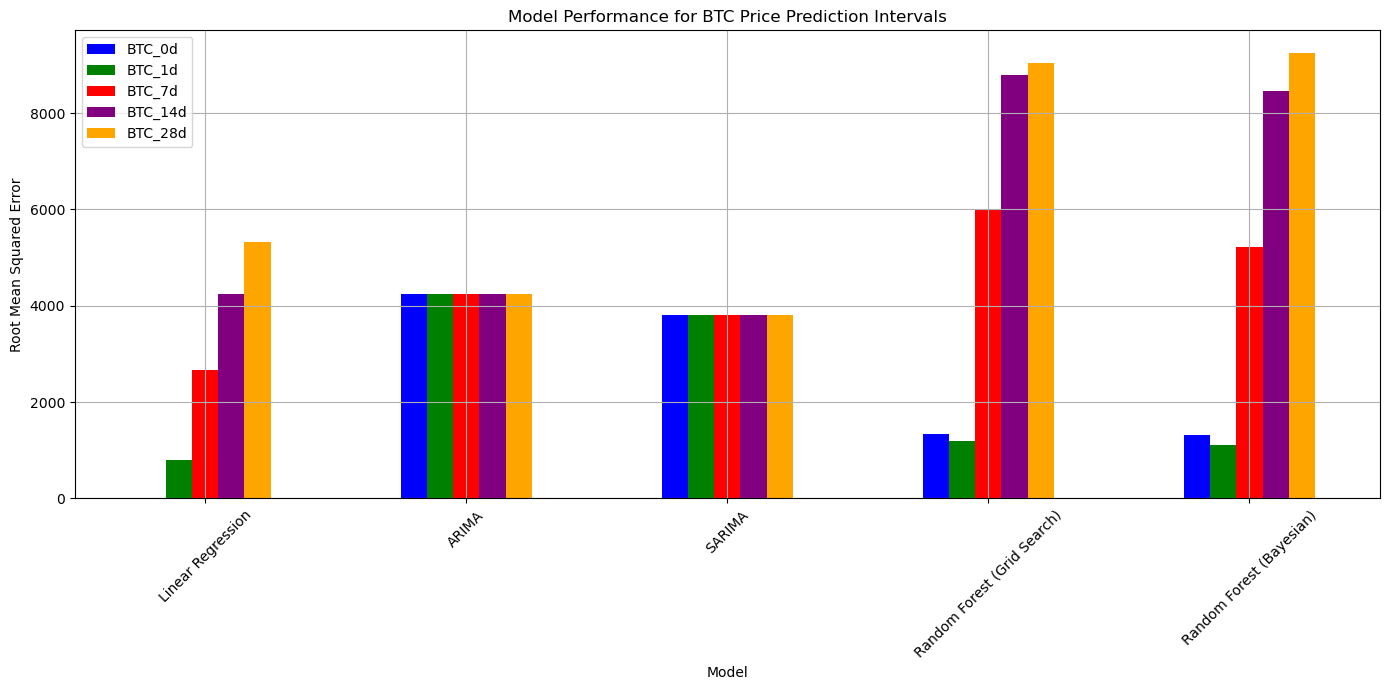

In [9]:
# Step 6 - Evaluate the performance of each model and compare how well they predict future BTC prices at different intervals.

import pandas as pd
import matplotlib.pyplot as plt

# Extract RMSE values from the results DataFrame for each model
rmse_values = {
    'Linear Regression': results.loc[results['Model'] == 'Linear Regression', 'RMSE'].values,
    'ARIMA': results.loc[results['Model'] == 'ARIMA', 'RMSE'].values,
    'SARIMA': results.loc[results['Model'] == 'SARIMA', 'RMSE'].values,
    'Random Forest (Grid Search)': results.loc[results['Model'] == 'Random Forest Grid Search', 'RMSE'].values,
    'Random Forest (Bayesian)': results.loc[results['Model'] == 'Random Forest Bayesian Optimization', 'RMSE'].values
}

# Convert the dictionary to a DataFrame for easier plotting and display
# Update index to match the intervals predicted: BTC_0d, BTC_1d, BTC_7d, BTC_14d, BTC_28d
rmse_df = pd.DataFrame(rmse_values, index=['BTC_0d', 'BTC_1d', 'BTC_7d', 'BTC_14d', 'BTC_28d']).T

# Display the RMSE values in tabular form
print("\nRoot Mean Squared Error (RMSE) Values for Each Model and Prediction Interval:\n")
print(rmse_df)

# Plotting the RMSE results
plt.figure(figsize=(14, 7))
rmse_df.plot(kind='bar', ax=plt.gca(), color=['blue', 'green', 'red', 'purple', 'orange'])  # Assign colors for clarity
plt.title('Model Performance for BTC Price Prediction Intervals')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout for better visualization

# Save the plot to a PNG file
plt.savefig('model_performance_btc_prediction.png')

# Show the plot
plt.show()

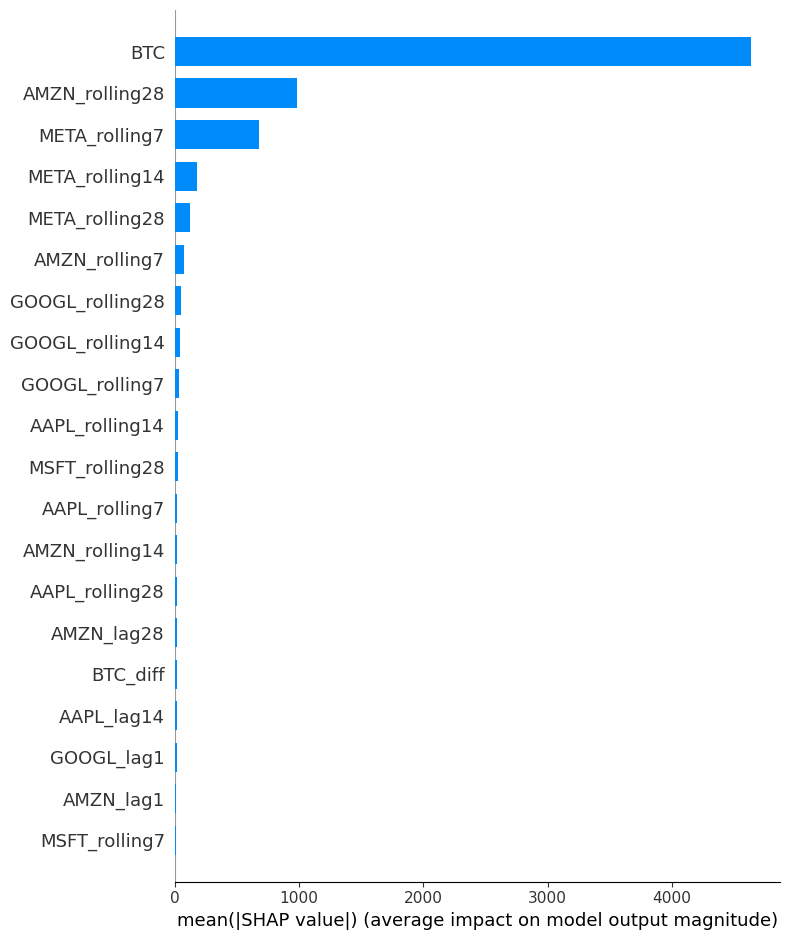

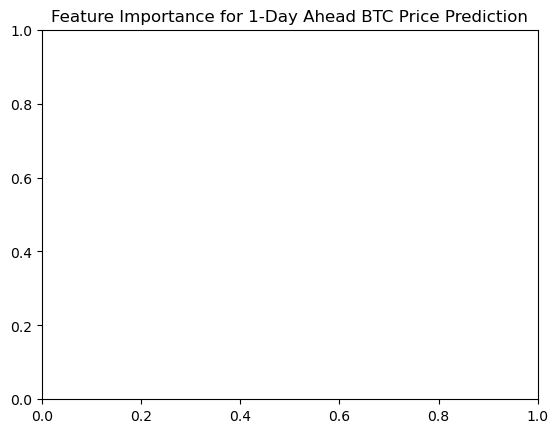


Feature Importance Based on Mean Absolute SHAP Values:

            Feature  Mean Absolute SHAP Value
5               BTC               4635.510671
37   AMZN_rolling28                980.869124
28    META_rolling7                679.362934
33   META_rolling14                181.599228
38   META_rolling28                124.653314
27    AMZN_rolling7                 76.561117
36  GOOGL_rolling28                 50.138500
31  GOOGL_rolling14                 41.558128
26   GOOGL_rolling7                 37.975640
35   AAPL_rolling14                 27.788614
39   MSFT_rolling28                 26.386359
30    AAPL_rolling7                 21.107072
32   AMZN_rolling14                 19.945065
40   AAPL_rolling28                 17.321263
22       AMZN_lag28                 17.196379
41         BTC_diff                 17.144849
20       AAPL_lag14                 16.934086
6        GOOGL_lag1                 15.783689
7         AMZN_lag1                 13.691994
29    MSFT_rolling7    

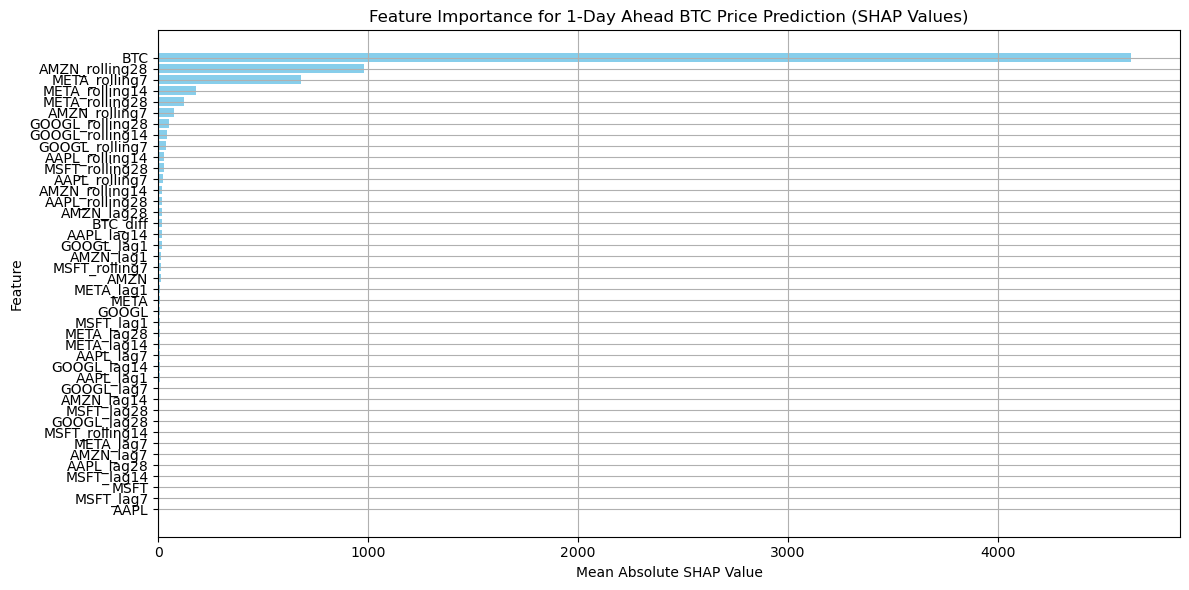

In [7]:
# Step 7 - Interpretability and Feature Importance - Understand the impact of each feature on the predictions 
# using  feature importance analysis. 

import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Define the best Random Forest model based on previous evaluation (Grid Search had the best performance for BTC_1d)
# Using parameters that performed best in Step 6
rf_best_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Parameters can be adjusted as necessary

# Fit the best Random Forest model on the combined data to analyze feature importance
rf_best_model.fit(X_train, y_train['BTC_1d'])

# SHAP values for interpretability
explainer = shap.Explainer(rf_best_model, X_train)  # Create an explainer for the model
shap_values = explainer(X_train)  # Compute SHAP values

# Visualize SHAP values to understand feature impact on predictions
shap.summary_plot(shap_values, X_train, plot_type='bar')
plt.title('Feature Importance for 1-Day Ahead BTC Price Prediction')
plt.show()

# Extract mean absolute SHAP values to assess feature importance quantitatively
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean Absolute SHAP Value': np.abs(shap_values.values).mean(axis=0)
})

# Sort the table by mean absolute SHAP value to show the most important features first
shap_importance_sorted = shap_importance.sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Display the sorted feature importance in tabular form
print("\nFeature Importance Based on Mean Absolute SHAP Values:\n")
print(shap_importance_sorted)

# Optional: Display the table as a bar plot for additional visualization
plt.figure(figsize=(12, 6))
plt.barh(shap_importance_sorted['Feature'], shap_importance_sorted['Mean Absolute SHAP Value'], color='skyblue')
plt.title('Feature Importance for 1-Day Ahead BTC Price Prediction (SHAP Values)')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(True)
plt.tight_layout()
plt.show()


RMSE Results for All BTC Lags Across Different Models:

                         BTC_0d        BTC_1d        BTC_7d       BTC_14d  \
Linear Regression  10503.477156  10535.004414  10383.908497  10013.182051   
ARIMA               6874.287684   6856.982634   7008.926064   7035.050186   
SARIMA              7562.582300   7506.438048   7339.100550   7005.567152   
Random Forest       3546.398516   3625.273526   5551.751697   8700.980179   

                       BTC_28d  
Linear Regression  7433.756502  
ARIMA              6912.922978  
SARIMA             6285.767415  
Random Forest      9331.226382  


<Figure size 1400x800 with 0 Axes>

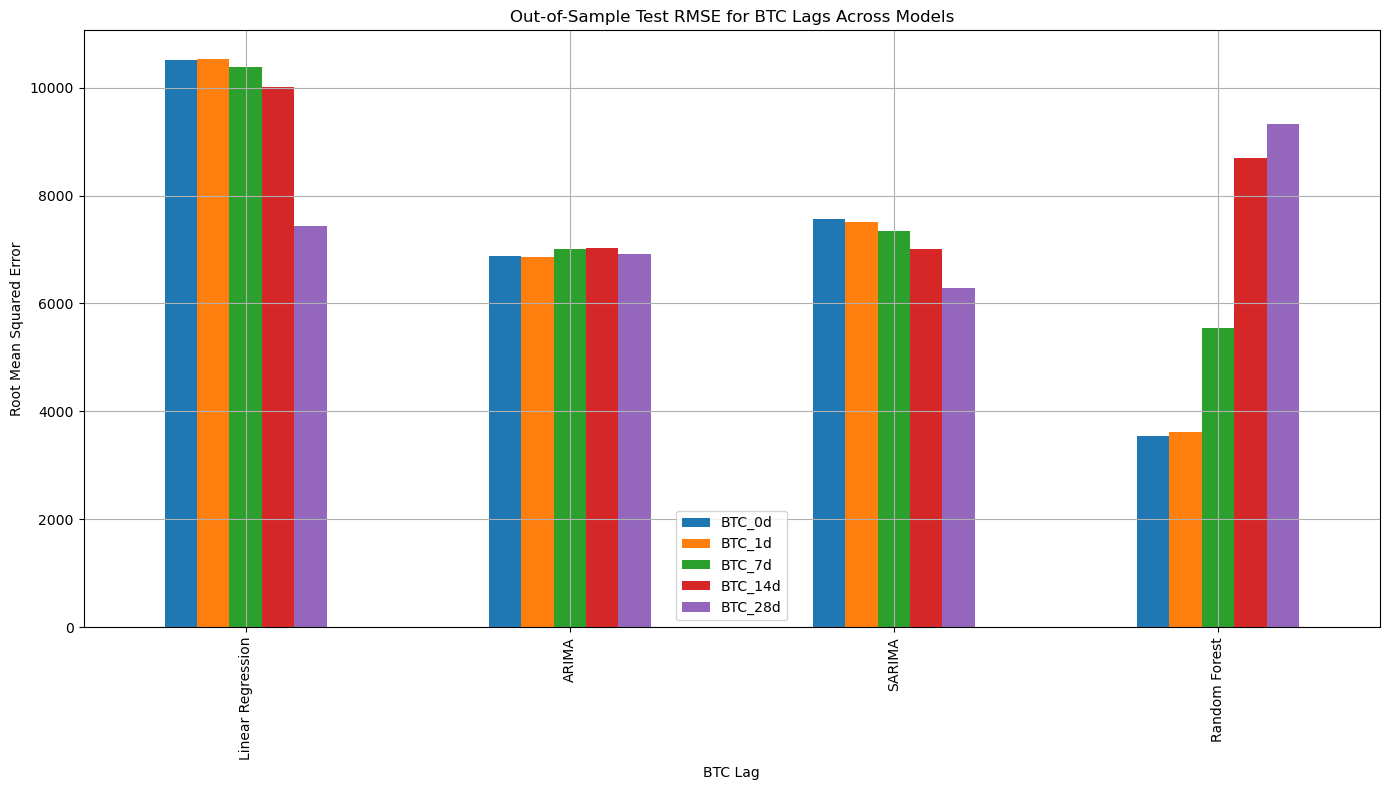


First Date in DataFrame: 2022-01-29 00:00:00
Last Date in DataFrame: 2023-12-02 00:00:00


In [8]:
# Step 8 - Perform validation with out-of-sample testing and sensitivity analysis to ensure robustness.
# Split the data into training and testing sets based on a fixed time cutoff.

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_data is already defined and preprocessed with features and target variables
# Define X as all features excluding BTC lagged targets, and y as the BTC lagged targets
feature_cols = [col for col in combined_data.columns if 'BTC' not in col]  # Features excluding BTC targets
target_cols = ['BTC_0d', 'BTC_1d', 'BTC_7d', 'BTC_14d', 'BTC_28d']  # BTC lagged targets

# Split the combined_data into X (features) and y (target variables)
X = combined_data[feature_cols]
y = combined_data[target_cols]

# Split the data into training and testing sets (80% train, 20% test)
cutoff_date = int(len(combined_data) * 0.8)
X_train, X_test = X.iloc[:cutoff_date], X.iloc[cutoff_date:]
y_train, y_test = y.iloc[:cutoff_date], y.iloc[cutoff_date:]

# Initialize a dictionary to store RMSE results for each lag value across all models
rmse_results = {
    'Linear Regression': {},
    'ARIMA': {},
    'SARIMA': {},
    'Random Forest': {}
}

# Loop through each lag and fit the models, make predictions, and calculate RMSE
for lag in target_cols:
    # 1. Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train[lag])
    lr_predictions = lr_model.predict(X_test)
    lr_rmse = mean_squared_error(y_test[lag], lr_predictions, squared=False)  # Use RMSE for consistency
    rmse_results['Linear Regression'][lag] = lr_rmse
    
    # 2. ARIMA Model: Including stock prices as exogenous variables (optional, keep if relevant)
    arima_model = ARIMA(endog=y_train['BTC_0d'], exog=X_train, order=(5, 1, 0))  # BTC_0d as current BTC target
    arima_fit = arima_model.fit()
    arima_predictions = arima_fit.forecast(steps=len(X_test), exog=X_test)
    arima_rmse = mean_squared_error(y_test[lag], arima_predictions, squared=False)
    rmse_results['ARIMA'][lag] = arima_rmse

    # 3. SARIMA Model: Seasonal component added to capture seasonality (optional, keep if relevant)
    sarima_model = SARIMAX(endog=y_train['BTC_0d'], exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_fit = sarima_model.fit(disp=False)
    sarima_predictions = sarima_fit.forecast(steps=len(X_test), exog=X_test)
    sarima_rmse = mean_squared_error(y_test[lag], sarima_predictions, squared=False)
    rmse_results['SARIMA'][lag] = sarima_rmse
    
    # 4. Random Forest Model (Best from Grid Search)
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Parameters from best Grid Search
    rf_model.fit(X_train, y_train[lag])
    rf_predictions = rf_model.predict(X_test)
    rf_rmse = mean_squared_error(y_test[lag], rf_predictions, squared=False)
    rmse_results['Random Forest'][lag] = rf_rmse

# Convert the rmse_results dictionary to a DataFrame for easier viewing
rmse_df = pd.DataFrame(rmse_results).T
print("\nRMSE Results for All BTC Lags Across Different Models:\n")
print(rmse_df)

# Plotting the RMSE values for each BTC lag across models
plt.figure(figsize=(14, 8))
rmse_df.plot(kind='bar', figsize=(14, 8))
plt.title('Out-of-Sample Test RMSE for BTC Lags Across Models')
plt.xlabel('BTC Lag')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the first and last dates in the combined data
first_date = combined_data.index.min()
last_date = combined_data.index.max()
print(f"\nFirst Date in DataFrame: {first_date}")
print(f"Last Date in DataFrame: {last_date}")
